Nessa versão do modelo, serão adicionadas taxas de natalidade e mortalidade de humanos, para representar a entrada de novos indivíduos em $S$ ao longo dos anos. 

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log
from scipy.interpolate import interp1d
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sage.plot.plot3d.parametric_surface import ParametricSurface
import plotly.graph_objects as go
import plotly.express as px

In [2]:
anos = [1970, 1980, 1996, 2000, 2007, 2010] 
pop = [311622, 633383, 1154330, 1405835, 1646602, 1802014] 

In [3]:
interpolate_2004 = 2004
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2004),
      (y_interp(interpolate_2004)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2004),
      ((y_interp(interpolate_2004))*(0.005)).round())

A população no ano 2004 foi estimada (2000-2007) como 1543416.0
A população rural no ano 2004 foi estimada (2000-2007) como 7717.0


In [4]:
interpolate_2005 = 2005
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2005),
      (y_interp(interpolate_2005)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2005),
      ((y_interp(interpolate_2005))*(0.005)).round())

A população no ano 2005 foi estimada (2000-2007) como 1577811.0
A população rural no ano 2005 foi estimada (2000-2007) como 7889.0


In [5]:
interpolate_2006 = 2006
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2006),
      (y_interp(interpolate_2006)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2006),
      ((y_interp(interpolate_2006))*(0.005)).round())

A população no ano 2006 foi estimada (2000-2007) como 1612207.0
A população rural no ano 2006 foi estimada (2000-2007) como 8061.0


In [6]:
interpolate_2007 = 2007
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2000-2007) como".format(interpolate_2007),
      (y_interp(interpolate_2007)).round())

print("A população rural no ano {} foi estimada (2000-2007) como".format(interpolate_2007),
      ((y_interp(interpolate_2007))*(0.005)).round())

A população no ano 2007 foi estimada (2000-2007) como 1646602.0
A população rural no ano 2007 foi estimada (2000-2007) como 8233.0


In [7]:
interpolate_2008 = 2008
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2007-2010) como".format(interpolate_2008),
      (y_interp(interpolate_2008)).round())

print("A população rural no ano {} foi estimada (2007-2010) como".format(interpolate_2008),
      ((y_interp(interpolate_2008))*(0.005)).round())

A população no ano 2008 foi estimada (2007-2010) como 1698406.0
A população rural no ano 2008 foi estimada (2007-2010) como 8492.0


In [8]:
interpolate_2009 = 2009
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2007-2010) como".format(interpolate_2009),
      (y_interp(interpolate_2009)).round())

print("A população rural no ano {} foi estimada (2007-2010) como".format(interpolate_2009),
      ((y_interp(interpolate_2009))*(0.005)).round())

A população no ano 2009 foi estimada (2007-2010) como 1750210.0
A população rural no ano 2009 foi estimada (2007-2010) como 8751.0


In [9]:
interpolate_2010 = 2010
  
y_interp = interp1d(anos, pop)
print("A população no ano {} foi estimada (2007-2010) como".format(interpolate_2010),
      (y_interp(interpolate_2010)).round())

print("A população rural no ano {} foi estimada (2007-2010) como".format(interpolate_2010),
      ((y_interp(interpolate_2010))*(0.005)).round())

A população no ano 2010 foi estimada (2007-2010) como 1802014.0
A população rural no ano 2010 foi estimada (2007-2010) como 9010.0


In [10]:
print('Diferença da população entre 2004 e 2005:')
print(((y_interp(interpolate_2005))*(0.005)).round() - ((y_interp(interpolate_2004))*(0.005)).round())
print(' ')
print('Diferença da população entre 2008 e 2007:')
print(((y_interp(interpolate_2008))*(0.005)).round() - ((y_interp(interpolate_2007))*(0.005)).round())
print(' ')
print('Diferença da população entre 2009 e 2010:')
print(((y_interp(interpolate_2010))*(0.005)).round() - ((y_interp(interpolate_2009))*(0.005)).round())

Diferença da população entre 2004 e 2005:
172.0
 
Diferença da população entre 2008 e 2007:
259.0
 
Diferença da população entre 2009 e 2010:
259.0


In [11]:
n(((172*3)+(259*2))/5)

206.800000000000

Aumento populacional anual médio de 206.8 

Dessa maneira, a interpolação é feita utilizando pontos iniciais e finais diferentes para 2008 e 2009 em comparação com os demais, visto que, como temos dados para 2007, a interpolação é feita com esse valor para pontos até esse ano, e a partir dele usa 2010 como ponto final da interpolação. Abaixo será usado 2010 como ponto final da interpolação em todos os casos.

In [12]:
def interpolation(d, x):
    output = d[0][1] + (x - d[0][0]) * ((d[1][1] - d[0][1])/(d[1][0] - d[0][0]))
    return output
  

data_0_7=[[2000, 1405835],[2007, 1646602]]   # [[ano x, pop x],[ano y, pop y]]
data_0_10=[[2000, 1405835],[2010, 1802014]]  
data_7_10=[[2007, 1646602],[2010, 1802014]]     

In [13]:
ano_2004 = 2004
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2004),
             interpolation(data_0_10, ano_2004).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2004),
             (interpolation(data_0_10, ano_2004)*(0.005)).round())

A população no ano 2004 foi estimada (2000-2010) como 1564307
A população rural de Manaus no ano 2004 foi estimada (2000-2010) como 7822


In [14]:
ano_2005 = 2005
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2005),
             interpolation(data_0_10, ano_2005).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2005),
             (interpolation(data_0_10, ano_2005)*(0.005)).round())

A população no ano 2005 foi estimada (2000-2010) como 1603925
A população rural de Manaus no ano 2005 foi estimada (2000-2010) como 8020


In [15]:
ano_2006 = 2006
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2006),
             interpolation(data_0_10, ano_2006).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2006),
             (interpolation(data_0_10, ano_2006)*(0.005)).round())

A população no ano 2006 foi estimada (2000-2010) como 1643542
A população rural de Manaus no ano 2006 foi estimada (2000-2010) como 8218


In [16]:
ano_2007 = 2007
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2007),
             interpolation(data_0_10, ano_2007).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2007),
             (interpolation(data_0_10, ano_2007)*(0.005)).round())

A população no ano 2007 foi estimada (2000-2010) como 1683160
A população rural de Manaus no ano 2007 foi estimada (2000-2010) como 8416


In [17]:
ano_2008 = 2008
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2008),
             interpolation(data_0_10, ano_2008).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2008),
             (interpolation(data_0_10, ano_2008)*(0.005)).round())

A população no ano 2008 foi estimada (2000-2010) como 1722778
A população rural de Manaus no ano 2008 foi estimada (2000-2010) como 8614


In [18]:
ano_2009 = 2009
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2009),
             interpolation(data_0_10, ano_2009).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2009),
             (interpolation(data_0_10, ano_2009)*(0.005)).round())

A população no ano 2009 foi estimada (2000-2010) como 1762396
A população rural de Manaus no ano 2009 foi estimada (2000-2010) como 8812


In [19]:
ano_2010 = 2010
  
print("A população no ano {} foi estimada (2000-2010) como".format(ano_2010),
             interpolation(data_0_10, ano_2010).round())

print("A população rural de Manaus no ano {} foi estimada (2000-2010) como".format(ano_2010),
             (interpolation(data_0_10, ano_2010)*(0.005)).round())

A população no ano 2010 foi estimada (2000-2010) como 1802014
A população rural de Manaus no ano 2010 foi estimada (2000-2010) como 9010


In [20]:
print('Diferença da população entre 2004 e 2005:')
print(((interpolation(data_0_10, ano_2005)*(0.005)).round()-(interpolation(data_0_10, ano_2004)*(0.005)).round()))
print(' ')
print('Diferença da população entre 2009 e 2010:')
print(((interpolation(data_0_10, ano_2010)*(0.005)).round()-(interpolation(data_0_10, ano_2009)*(0.005)).round()))

Diferença da população entre 2004 e 2005:
198
 
Diferença da população entre 2009 e 2010:
198


Como o valor da população em 2007 é fixo, foi decidido utilizar a primeira interpolação para a modelagem. Sendo assim, $N_0=7717$ e a taxa de natalidade considerada será de 206.8

#### Modelando:

In [21]:
T_linha = 25.6
T1= 26.4 
T2= 0.025
omega1= 0.017
phi1= -1.45

R1= 250.083 
R2= 0.565
omega2= 0.02
phi2=1.6

B_E=200
p_ME=0.9
p_ML=0.75
p_MP=0.85
tau_E=1
tau_P=1
c1=0.019
c2=-0.021

D1=36.5
b1=0.04

A=12.5
B=15
C=-48.78

b2=0.09
tau_H=10
DD=105
Tmin=14.5
gamma= 1/365 
R_L = 450
N = 7717 #População estimada para 2004
M = 300000 
E_M0 = 1 #Analisando a infecção iniciando com apenas um mosquito exposto e um humano infectado
I_H0 = 1
I_M0 = 0
R_H0 = 0
if E_M0 is None:
        E_M0 = M / 100

S_H0 = N - I_H0 - R_H0
S_M0 = M - E_M0 - I_M0

In [22]:
def R0_sir(a, b2, gamma):
    return abs((a * b2) / gamma)
    
#R0_sir_curr = R0_sir(a_curr, b2, gamma)
    
def R0_sei(a, b1, b3, l, mu):
    return abs((a * b1 * b3) / ((b3 + l) * mu + mu** 2))
    
#R0_sei_curr = R0_sei(a_curr, b1, b3_curr, l_curr, mu_curr)
    
def R0_full(a, b1, b2, b3, gamma, l, mu):
    return abs(((a** 2 * b1 * b2 * b3) / (b3 * gamma * mu + gamma * l * mu + gamma * mu** 2))**(1/2))
    
#R0_curr = R0(a_curr, b1, b2, b3_curr, gamma, l_curr, mu_curr)

In [23]:
def calculate_initial_values(R_L, T_linha, Tmin, DD, D1, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                            p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, gamma):
    
    T0 = T1 * (1 + T2 * cos(omega1 * 0 - phi1))
    R0 = R1 * (1 + R2 * cos(omega2 * 0 - phi2))

    tau_L0 = 1 / (c1 * T0 + c2)

    p_LT0 = np.exp(-(c1 * T0 + c2))
    
    p_LR0 = (4 * p_ML / R_L**2) * R0 * (max(1e-5, R_L - R0))
    
    p_LRT0 = p_LR0 * p_LT0
    
    p_ER0 = (4 * p_ME / R_L**2) * R0 * (max(1e-5, R_L - R0))
    
    p_PR0 = (4 * p_MP / R_L**2) * R0 * (max(1e-5, R_L - R0))

    a0 = (max(1e-5, T0 - T_linha)) / D1
    b0 = B_E * p_ER0 * p_LRT0 * p_PR0 / (tau_E + tau_L0 + tau_P)

    tau_M0 = DD / (max(1e-5, T0 - Tmin))
    
    b30 =  1 / tau_M0
    
    p0 = np.exp(-1 / (A * T0**2 + B * T0 + C))
    l0 = p0 ** tau_M0

    mu0 = -log(p0)

    initial_R0_sir = R0_sir(a0, b2, gamma)
    initial_R0_sei = R0_sei(a0, b1, b30, l0, mu0)
    initial_R0_full = R0_full(a0, b1, b2, b30, gamma, l0, mu0)
    
    return initial_R0_sir, initial_R0_sei, initial_R0_full, a0

In [24]:
initial_R0_sir, initial_R0_sei, initial_R0_full, a0 = calculate_initial_values(R_L, T_linha, Tmin, DD, D1, 
                                                                           T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                                                                           p_ML, p_ME, p_MP, c1, c2, A, B, C, b1, b2, gamma)

In [25]:
print(f'R0_sir = {initial_R0_sir} \nR0_sei = {initial_R0_sei}\nR0_acoplado = {initial_R0_full}\nTaxa de picadas = {a0}')

R0_sir = 0.7915786450042152 
R0_sei = 0.9002047882569278
R0_acoplado = 0.8441462471128599
Taxa de picadas = 0.02409676240499894


Com esses parâmetros, a doença não deveria se estabelecer, dado que $\mathcal{R}_0$ está menor que 1, tanto para o SIR quanto o SEI quanto o acoplado. Posteriormente será incluindo um parâmetro multiplicativo $K$ multiplicando as proporções $b_1$ e $b_2$, representando o maior contato entre humanos e mosqutos no caso de queimadas. Assim, incluindo um parâmetro $\mu_H$, assumindo que a taxa de natalidade e mortalidade de humanos é a mesma ($\mu_H = 206.8/365$ é a nossa taxa diária de nascimentos e mortes), o modelo fica como a seguir:

In [26]:
def model(t, z, T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, mu_H):
    
    S_H, I_H, R_H, S_M, E_M, I_M = z
    
    # Funções de temperatura e chuva
    def Temp(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def Rain(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    R_curr = Rain(t)
    T_curr = Temp(t)
    
    # Duração da fase de desenvolvimento das larvas
    def tau_L(Temp):
        return 1 / (c1 * Temp + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(Temp):
        return np.exp(-1 / (A*Temp**2 + B*Temp + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(Temp):
        return np.exp(-(c1 * Temp + c2))
    
    def p_LR(Rain):
        return (4*p_ML/R_L**2) * Rain * (max(10^-5,R_L - Rain))
    
    def p_LRT(Rain,Temp):
        return p_LR(Rain)*p_LT(Temp)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(Rain):
        return (4*p_ME/R_L**2) * Rain * (max(10^-5,R_L - Rain))
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(Rain):
        return (4*p_MP/R_L**2) * Rain * (max(10^-5,R_L - Rain))

    # Duração do ciclo esporogônico
    def tau_M(Temp):
        return DD / (max(10^-5,Temp - Tmin))
    
    tau_M_curr = tau_M(T_curr)

    # Taxa de infecção de expostos (1/Duração do ciclo esporogônico)
    def b3(tau_M, Temp):
        return 1/tau_M
    
    b3_curr = b3(tau_M_curr, T_curr)
    
    # Definindo a função de sobrevivência do mosquito
    def l_tau_M(tau_M, Temp):  
        p_T = p(Temp)
        return p_T**tau_M
    
    l_curr = l_tau_M(tau_M_curr, T_curr)

    # Definindo a taxa de mortalidade do mosquito
    def mu(Temp):
        return -log(p(Temp))
    
    mu_curr = mu(T_curr)
    
    # Calcula a taxa de picada e probabilidade de transmissão
    def a(Temp):
        return (max(10^-5, Temp - T_linha)) / D1
    
    a_curr = a(T_curr)
    
    def b(Rain,Temp):
        return B_E * p_ER(Rain) * p_LRT(Rain,Temp) * p_PR(Rain) / (tau_E + tau_L(Temp) + tau_P)
    
    b_curr = b(R_curr, T_curr)
    
    dShdt = mu_H * N -a_curr * b2 * (I_M / N) * S_H - mu_H * S_H
    dIhdt = a_curr * b2 * (I_M / N) * S_H - gamma * I_H - mu_H * I_H
    dRhdt = gamma * I_H - mu_H * R_H
    
    dSmdt = b_curr - a_curr * b1 * (I_H / N) * S_M - mu_curr * S_M
    dEmdt = a_curr * b1 * (I_H / N) * S_M - mu_curr * E_M - b3_curr * E_M - l_curr * E_M
    dImdt = b3_curr * E_M - mu_curr * I_M
    
    return [dShdt, dIhdt, dRhdt, dSmdt, dEmdt, dImdt] 

In [27]:
n(206.8/365)

0.566575342465753

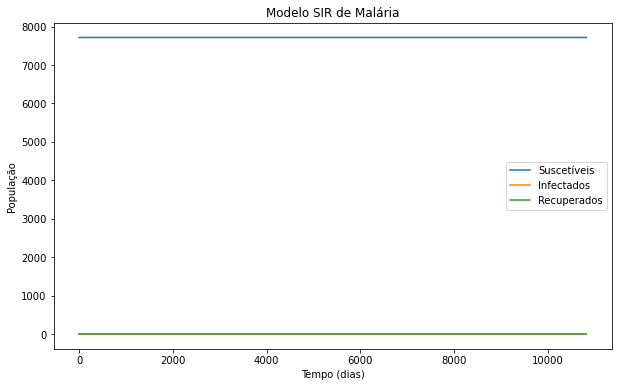

In [28]:
mu_H = 0.566575342465753

args = (T_linha, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, E_M0, I_H0, I_M0, mu_H)

t_eval = np.linspace(0, 10825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 10825
sol = solve_ivp(model, [0, 10825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_H, label='Suscetíveis')
plt.plot(times, I_H, label='Infectados')
plt.plot(times, R_H, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

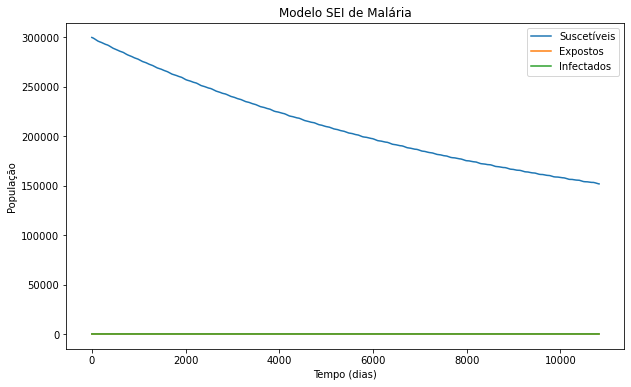

In [29]:
t_eval = np.linspace(0, 10825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 10825
sol = solve_ivp(model, [0, 10825], [S_H0, I_H0, R_H0, S_M0, E_M0, I_M0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
#sol

times = sol.t
S_H, I_H, R_H, S_M, E_M, I_M = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S_M, label='Suscetíveis')
plt.plot(times, E_M, label='Expostos')
plt.plot(times, I_M, label='Infectados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SEI de Malária')

plt.legend()

plt.show()

Como esperado, com $\mathcal{R}_0$ menor que 1, e apenas 1 mosquito exposto e 1 humano infectado, a doença não consegue se estabelecer. Contudo, com a modificação das equações do SIR, será necessário modificar as equações do $\mathcal{R}_0$.